#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, log_loss, recall_score,accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,  KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import xgboost
import time

import keras
import keras_metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout


import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
def metrics(x,real, clf):
    print('roc_auc: ',roc_auc_score(real,clf.predict(x)))
    print('recall: ',recall_score(real,clf.predict(x)))
    print('accuracy: ',accuracy_score(real,clf.predict(x)))
    print('precision: ',precision_score(real,clf.predict(x)))
    return pd.DataFrame({'real':real,'predict':clf.predict(x),'proba1':clf.predict_proba(x)[:,1]})

def metrics2(real,x):
    print('roc_auc: ',roc_auc_score(real,x))
    print('recall: ',recall_score(real,x))
    print('precision: ',precision_score(real,x))
    return pd.DataFrame({'real':real,'predict':x})

#### Считывание данных

In [4]:
data = pd.read_excel('ds3.xlsx')

#### Удаление пропусков

In [5]:
for i in data.columns:
    if data[i].isna().sum()!=0:
        data[i] = data[i].fillna(0)

#### Разделение на целевую переменную и предикторы

In [6]:
X = data.drop('class',axis=1)
y = data['class']

#### Масштабирование

In [7]:
XScale = pd.DataFrame(preprocessing.scale(X))
XScale.columns = X.columns
X=XScale

#### Распределение целевой переменной

In [8]:
y.value_counts()

0    377
1    266
Name: class, dtype: int64

#### Отбор важности признаков

In [9]:
forest = RandomForestClassifier(n_estimators=4500, max_depth = 20, n_jobs=-1,
                                      random_state=1234).fit(X, y)

In [10]:
forest_predictions = forest.predict(X)
features = pd.DataFrame(forest.feature_importances_, index=X.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features.head(15)

,Importance
totalEnergy7,0.026990
totalEnergy10,0.023210
count500_10,0.022962
count500_7,0.022529
totalEnergy5,0.020814
count500_15,0.020531
totalEnergy15,0.018050
count500_20,0.017753
count500_5,0.017151
medianCount10,0.016887


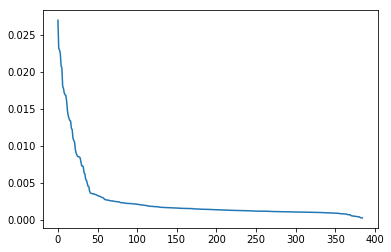

In [11]:
plt.plot(range(len(features.Importance.tolist())), 
         features.Importance.tolist())

In [12]:
col = features.index.tolist()
X1 = X[col]
X2 = X[col[:200]]
X3 = X[col[:120]]
X4 = X[col[:50]]
X5 = X[col[:20]]
X6 = X[col[:10]]

#### Разбиваем на тестовую и обучающую выборки

In [13]:
shuf = True

In [14]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train4, X_test4, y_train, y_test = train_test_split(X4, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train5, X_test5, y_train, y_test = train_test_split(X5, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train6, X_test6, y_train, y_test = train_test_split(X6, y, test_size=0.25,random_state=12345, shuffle=shuf)

## Построение моделей

### Логистическая регрессия

In [55]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train1, y_train, cv=kf, scoring='recall').mean()) 

0.7511380250548113


In [56]:
lr.fit(X_train1,y_train)
a=metrics(X_test1,y_test,lr)

roc_auc:  0.7794943820224719
recall:  0.75
accuracy:  0.782608695652174
precision:  0.7605633802816901


In [57]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train2, y_train, cv=kf, scoring='recall').mean()) 

0.7446455123069183


In [58]:
lr.fit(X_train2,y_train)
a=metrics(X_test2,y_test,lr)

roc_auc:  0.8145287141073657
recall:  0.7638888888888888
accuracy:  0.8198757763975155
precision:  0.8208955223880597


In [59]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train3, y_train, cv=kf, scoring='recall').mean()) 

0.7652200214897489


In [60]:
lr.fit(X_train3,y_train)
a=metrics(X_test3,y_test,lr)

roc_auc:  0.8102372034956306
recall:  0.7777777777777778
accuracy:  0.8136645962732919
precision:  0.8


# Выбранная модель
### -----------------------------------------------------------------------

In [61]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train4, y_train, cv=kf, scoring='recall').mean()) 

0.7759600514263354


In [62]:
lr.fit(X_train4,y_train)
a=metrics(X_test4,y_test,lr)

roc_auc:  0.8214731585518102
recall:  0.7777777777777778
accuracy:  0.8260869565217391
precision:  0.8235294117647058



### -----------------------------------------------------------------------

In [63]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train5, y_train, cv=kf, scoring='recall').mean()) 

0.7192551876626482


In [64]:
lr.fit(X_train5,y_train)
a=metrics(X_test5,y_test,lr)

roc_auc:  0.8036048689138577
recall:  0.7083333333333334
accuracy:  0.8136645962732919
precision:  0.85


In [65]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train6, y_train, cv=kf, scoring='recall').mean()) 

0.7372587527250367


In [66]:
lr.fit(X_train6,y_train)
a=metrics(X_test6,y_test,lr)

roc_auc:  0.7936953807740326
recall:  0.7222222222222222
accuracy:  0.8012422360248447
precision:  0.8125


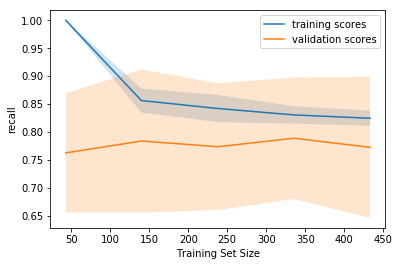

In [69]:
plot_learning_curve(LogisticRegression(solver = 'liblinear'), X_train4, y_train, scoring = 'recall', cv=10)

### Метод ближайших соседей

In [70]:
clf = KNeighborsClassifier()

In [100]:
search = GridSearchCV(clf, {'n_neighbors':[15,16,17],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train1, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 16, 'weights': 'distance'}, 0.805400378587184]

In [103]:
search = GridSearchCV(clf, {'n_neighbors':[21,22,23],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train2, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 22, 'weights': 'distance'}, 0.7648668377012139]

In [105]:
search = GridSearchCV(clf, {'n_neighbors':[19,20,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train3, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 20, 'weights': 'distance'}, 0.8006406257381093]

In [106]:
search = GridSearchCV(clf, {'n_neighbors':[7,8,9],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train4, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 8, 'weights': 'distance'}, 0.7863136359603138]

In [108]:
search = GridSearchCV(clf, {'n_neighbors':[19,20,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train5, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 20, 'weights': 'distance'}, 0.7942295748745442]

In [96]:
search = GridSearchCV(clf, {'n_neighbors':[19,20,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train6, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 20, 'weights': 'distance'}, 0.8039451907029016]

## -------------------------------------------------------------------------------------------------------------------------------

In [111]:
clf  = KNeighborsClassifier(n_neighbors=20,weights='distance')
print(cross_val_score(clf, X_train6, y_train, cv=kf, scoring='recall').mean())

0.8037298999422386


In [112]:
a=metrics(X_test6,y_test,clf.fit(X_train6,y_train))

roc_auc:  0.8132022471910113
recall:  0.75
accuracy:  0.8198757763975155
precision:  0.8307692307692308


### Градиентный бустинг

In [125]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[45,50,55],
              'max_depth': [3,5,10],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train1, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

78.83890128135681


[{'max_depth': 5, 'min_leaf_samples': 1, 'n_estimators': 50},
 0.8062588603722212]

In [131]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[440,450,460],
              'max_depth': [9,10,11]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train2, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

85.20146417617798


[{'max_depth': 10, 'n_estimators': 450}, 0.7946863550970065]

In [132]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[590,600,610],
              'max_depth': [3,4,5],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train3, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

157.16761565208435


[{'max_depth': 4, 'min_leaf_samples': 1, 'n_estimators': 590},
 0.797175414681978]

In [133]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[45,50,55],
              'max_depth': [9,10,11]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train4, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

5.43146276473999


[{'max_depth': 10, 'n_estimators': 50}, 0.7742059589842322]

In [134]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[52,55,60],
              'max_depth': [6,7,8]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train5, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

2.8298139572143555


[{'max_depth': 6, 'n_estimators': 55}, 0.8017438122261997]

In [135]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[40,45,50],
              'max_depth': [3,4,5]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train6, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

1.3503363132476807


[{'max_depth': 3, 'n_estimators': 40}, 0.8011606696206374]

## -------------------------------------------------------------------------------------------------------------------------------

In [174]:
xgb = xgboost.XGBClassifier(n_jobs = 4,n_estimators=590,max_depth =4,min_leaf_samples=1,scoring='recall',cv = 5)

In [182]:
a = metrics(X_test3,y_test,xgb.fit(X_train3,y_train))

roc_auc:  0.8439450686641697
recall:  0.7777777777777778
accuracy:  0.8509316770186336
precision:  0.875


In [185]:
print(cross_val_score(xgb, X_train3, y_train, cv=kf, scoring='recall').mean())

0.7968910668480254


## NN

In [174]:
len(X_train1.columns)

385

In [175]:
s = 385

In [176]:
model = Sequential()
model.add(Dense(10, input_dim=s,activation='sigmoid'))
model.add(Dropout(8))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(8))
model.add(Dense(1, activation='sigmoid'))

In [177]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[keras_metrics.recall(),keras_metrics.precision()])

In [179]:
model.fit(X_train1, y_train, epochs=7, batch_size=60,  verbose=2)

Epoch 1/7
 - 1s - loss: 0.7377 - recall: 1.0000 - precision: 0.4025
Epoch 2/7
 - 0s - loss: 0.6851 - recall: 1.0000 - precision: 0.4076
Epoch 3/7
 - 0s - loss: 0.6547 - recall: 0.9897 - precision: 0.4776
Epoch 4/7
 - 0s - loss: 0.6326 - recall: 0.9588 - precision: 0.6019
Epoch 5/7
 - 0s - loss: 0.6129 - recall: 0.9175 - precision: 0.6617
Epoch 6/7
 - 0s - loss: 0.5975 - recall: 0.8918 - precision: 0.7208
Epoch 7/7
 - 0s - loss: 0.5859 - recall: 0.8763 - precision: 0.7359


In [194]:
predictions = model.predict(X_test1).ravel()
pred=[]
for i in predictions:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)
a = pd.DataFrame({'real':y_test,'pred':pred,'p':predictions})
print([sum(y_test),len(a[a['real']==1][a['pred']==1])])

[72, 59]


In [195]:
b = metrics2(y_test,pred)

roc_auc:  0.8085986267166041
recall:  0.8194444444444444
precision:  0.7662337662337663
